<a href="https://colab.research.google.com/github/Cesaraville/Mall-Customers/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Cleaning Dataset

In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
Numerical = df.drop(['Gender', 'CustomerID'], axis=1)
Numerical.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


# Data Manipulation

## Age

<Axes: xlabel='Age', ylabel='Count'>

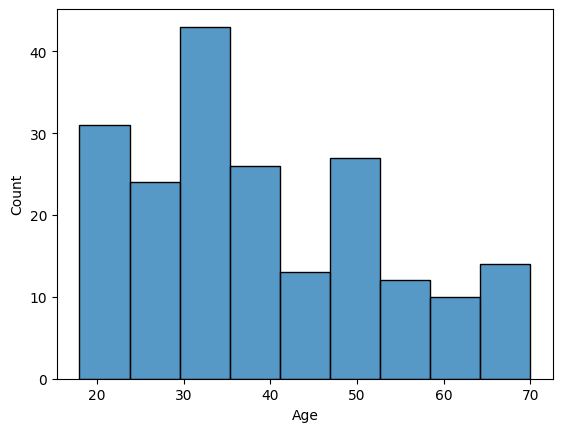

In [5]:
sns.histplot(Numerical['Age'])

In [6]:
Q1 = Numerical['Age'].quantile(0.25)
Q3 = Numerical['Age'].quantile(0.75)
IQR = Q3 - Q1

Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Numerical['Age'] = np.where(Numerical['Age'] > Upper_Limit, Upper_Limit, Numerical['Age'])

In [7]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler = MinMaxScaler()

Numerical['Age'] = MinMaxScaler.fit_transform(Numerical[['Age']])

<Axes: xlabel='Age', ylabel='Count'>

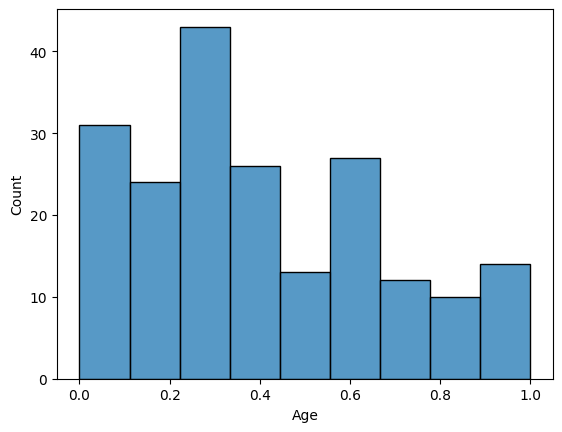

In [8]:
sns.histplot(Numerical['Age'])

## Annual Income

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

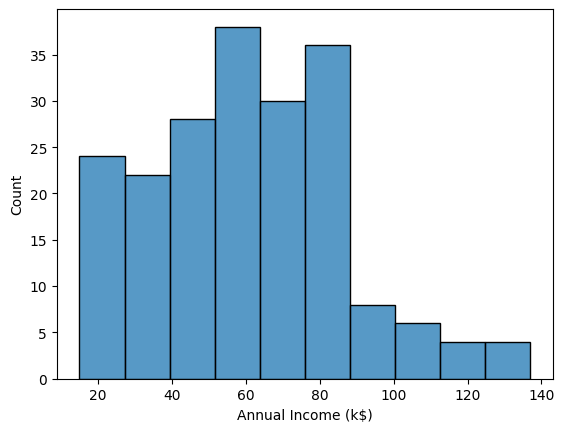

In [9]:
sns.histplot(Numerical['Annual Income (k$)'])

In [10]:
Q1 = Numerical['Annual Income (k$)'].quantile(0.25)
Q3 = Numerical['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Numerical['Annual Income (k$)'] = np.where(Numerical['Annual Income (k$)'] > Upper_Limit, Upper_Limit, Numerical['Annual Income (k$)'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler = MinMaxScaler()

Numerical['Annual Income (k$)'] = MinMaxScaler.fit_transform(Numerical[['Annual Income (k$)']])

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

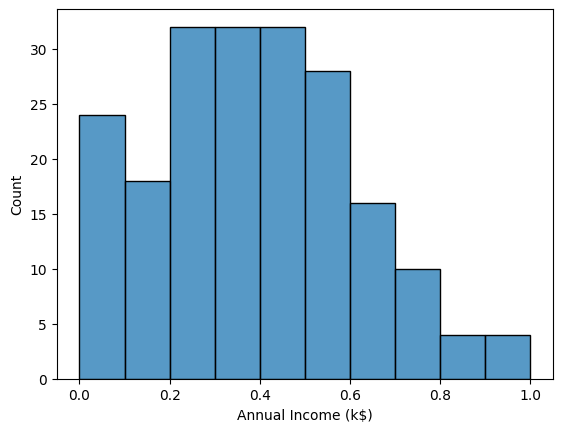

In [12]:
sns.histplot(Numerical['Annual Income (k$)'])

## Spending Score

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

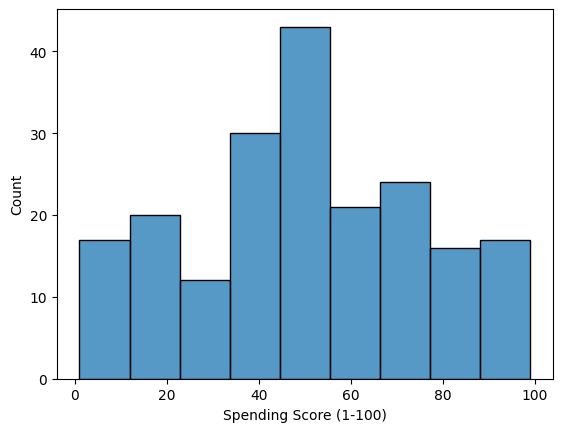

In [13]:
sns.histplot(Numerical['Spending Score (1-100)'])

In [14]:
Q1 = Numerical['Spending Score (1-100)'].quantile(0.25)
Q3 = Numerical['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1

Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

Numerical['Spending Score (1-100)'] = np.where(Numerical['Spending Score (1-100)'] > Upper_Limit, Upper_Limit, Numerical['Spending Score (1-100)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

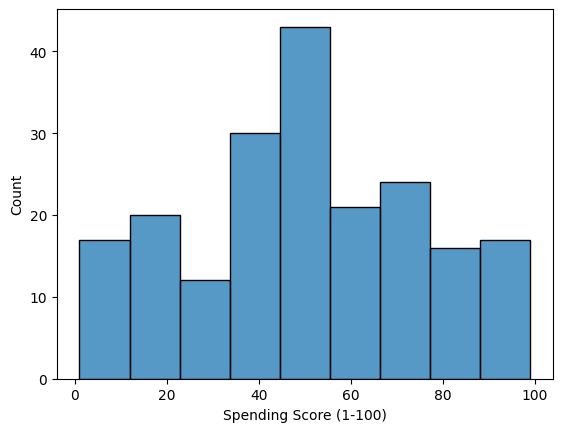

In [15]:
sns.histplot(Numerical['Spending Score (1-100)'])

## Scaling

In [16]:
Categorical = pd.get_dummies(df[['Gender']], drop_first=True)

# Training Data

In [17]:
Numerical_df = pd.DataFrame(Numerical)
Numerical_df.columns = Numerical_df.columns.astype(str)
df2 = pd.concat([Numerical_df, Categorical], axis=1)
df2

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,39.0,True
1,0.057692,0.000000,81.0,True
2,0.038462,0.008493,6.0,False
3,0.096154,0.008493,77.0,False
4,0.250000,0.016985,40.0,False
...,...,...,...,...
195,0.326923,0.891720,79.0,False
196,0.519231,0.942675,28.0,False
197,0.269231,0.942675,74.0,True
198,0.269231,1.000000,18.0,True


In [18]:
df2.corr()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Age,1.000000,-0.011537,-0.327227,0.060867
Annual Income (k$),-0.011537,1.000000,0.009930,0.054833
Spending Score (1-100),-0.327227,0.009930,1.000000,-0.058109
Gender_Male,0.060867,0.054833,-0.058109,1.000000


In [19]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=6, random_state=42)
Kmeans.fit(df2)

KMeans(n_clusters=6, random_state=42)

#Matrices

In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

Silhouette_score = silhouette_score(df2, Kmeans.labels_)
Davies_bouldin_score = davies_bouldin_score(df2, Kmeans.labels_)
Calinsku_harabasz_score = calinski_harabasz_score(df2, Kmeans.labels_)

print(f'Silhouette Score: {Silhouette_score}')
print(f'Davies Bouldin Score: {Davies_bouldin_score}')
print(f'Calinsku Harabasz Score: {Calinsku_harabasz_score}')

Silhouette Score: 0.591665871638838
Davies Bouldin Score: 0.4846581131074428
Calinsku Harabasz Score: 1420.9895912666316


# Visualization

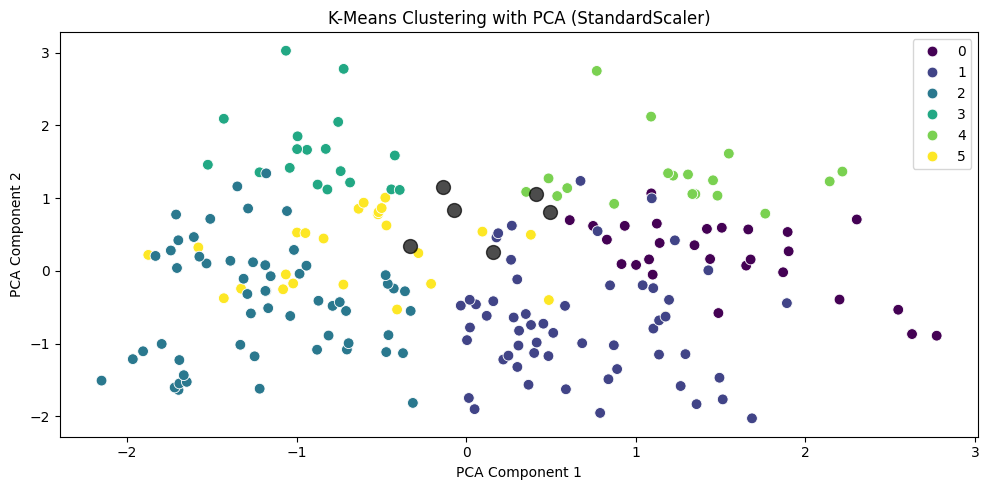

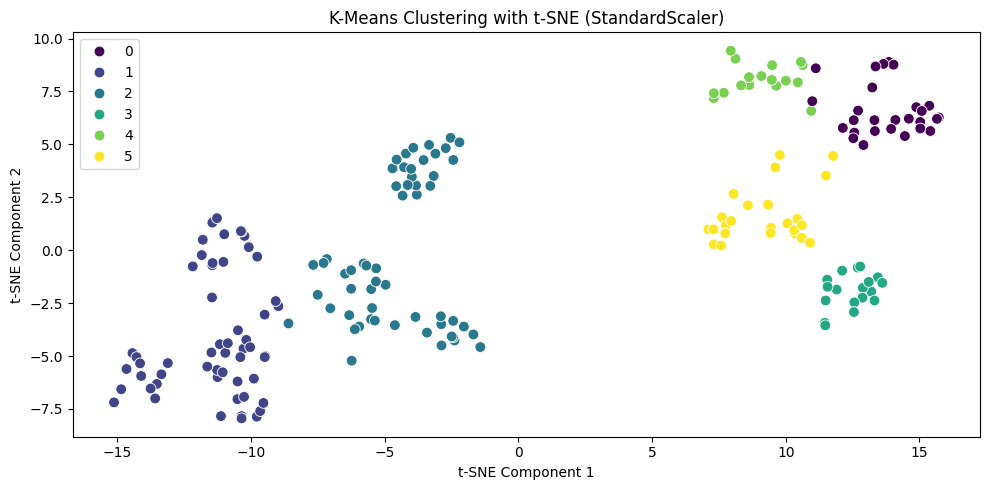

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

minmax_scaler = MinMaxScaler()
df_minmax = minmax_scaler.fit_transform(df2)

k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_minmax)

standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df2)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_standard)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=60)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            c='black', s=100, alpha=0.7)
plt.title('K-Means Clustering with PCA (StandardScaler)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.tight_layout()
plt.show()

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(df_standard)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('K-Means Clustering with t-SNE (StandardScaler)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.tight_layout()
plt.show()


For this dataset, I applied MinMaxScaling for clustering and metrics, however I applied z-score scaling for PCA/t-SNE visualizations to better interpret the cluster plots

In [28]:
clusters = kmeans.fit_predict(df2)
df['Cluster'] = clusters

cluster_profile = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})

print(cluster_profile)

               Age         Annual Income (k$)          Spending Score (1-100)  \
              mean min max               mean min  max                   mean   
Cluster                                                                         
0        42.565217  18  69          55.391304  15   99              44.717391   
1        31.370370  18  40          73.925926  18  137              90.703704   
2        42.434783  23  65          64.695652  21  126              29.478261   
3        43.529412  19  67          65.176471  16  137              10.382353   
4        41.435897  18  70          53.153846  28   87              56.205128   
5        28.806452  20  39          57.774194  15  126              74.548387   

                 
        min max  
Cluster          
0        39  50  
1        83  99  
2        20  36  
3         1  18  
4        51  65  
5        66  82  


#Conclusion

**For this dataset, the young, high-income customers demographic would be considered the target audience because it's mean spending score (Cluster 1) is 90.703704**